<a href="https://colab.research.google.com/github/barBraude/final_project/blob/confusion-matrix/Prediction_Of_CVD_Risk_Following__A_Sedentary_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df= pd.read_csv("/content/gdrive/MyDrive/Final project Bar &Rinat/datasets and papers/datasets/mockdata.csv")

Mounted at /content/gdrive


# **Data Preparation**

 **Remove the columns that their mean is less then 15%**

In [3]:
# cols_to_remove - choose all the colums that their meas is bigger then 0.15
cols_to_remove = np.where(df.isna().mean() > 0.15)[0]
df1 = df.iloc[:,np.setdiff1d(np.arange(0,df.shape[1]), cols_to_remove)]
df1

,CHRONO_4_CAT,AGE,RESIDENCE,BODY_FAT,WHOLE_BODY_FAT,WHOLE_BODY_FATFREE,SEASON_ASSESS,DRIVE,SUMMER,WINTER,...,BP_MEDS_ALL,SYS_BP_AUTO,DIA_BP_AUTO,ALCOHOL_STATUS,ALCOHOL_INTAKE,FRUIT_VEG,FRUITVEG_REC,N,FULL_CVD_RISK,DRIVE_HRS
0,3,43,1.0,36.8,26.1,44.8,2,2.0,3.0,0.5,...,0,119,71,2.0,3.0,1.333333,0.0,1,0.164995,2
1,3,46,1.0,43.5,51.7,67.2,1,1.0,3.0,1.0,...,1,142,92,2.0,2.0,3.000000,0.0,2,0.505950,1
2,2,47,1.0,31.8,18.3,39.2,4,1.0,1.0,0.5,...,0,177,95,2.0,1.0,1.833333,0.0,3,0.307337,1
3,2,63,2.0,37.2,27.0,45.6,4,2.0,3.0,1.0,...,1,129,78,2.0,3.0,5.000000,1.0,4,0.535705,2
4,4,54,1.0,36.9,24.7,42.3,3,1.0,0.5,0.5,...,0,119,72,2.0,2.0,4.333333,0.0,5,0.281880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,69,1.0,26.5,17.2,47.6,4,0.0,2.0,1.0,...,0,134,86,2.0,3.0,3.333333,0.0,4996,0.569880,0
4996,4,70,1.0,35.0,39.4,73.1,4,0.0,0.5,0.5,...,0,134,91,2.0,4.0,2.333333,0.0,4997,0.750447,0
4997,1,63,1.0,28.0,23.8,61.3,2,0.0,6.0,4.0,...,1,142,85,2.0,2.0,4.000000,0.0,4998,0.730383,0
4998,1,62,1.0,44.4,38.2,47.8,3,1.0,5.0,0.5,...,0,168,89,2.0,4.0,4.333333,0.0,4999,0.600544,1


In [4]:
cols_to_remove

array([ 6,  7,  9, 33, 35, 37, 38, 50, 51, 56, 57])

**Remove the rows that their mean is less then 15%**

In [5]:
rows_to_remove = np.where(df1.isna().mean(axis = 1) > 0.15)[0]
df2 = df1.iloc[np.setdiff1d(np.arange(0,df1.shape[0]), rows_to_remove), :]
df2

,CHRONO_4_CAT,AGE,RESIDENCE,BODY_FAT,WHOLE_BODY_FAT,WHOLE_BODY_FATFREE,SEASON_ASSESS,DRIVE,SUMMER,WINTER,...,BP_MEDS_ALL,SYS_BP_AUTO,DIA_BP_AUTO,ALCOHOL_STATUS,ALCOHOL_INTAKE,FRUIT_VEG,FRUITVEG_REC,N,FULL_CVD_RISK,DRIVE_HRS
0,3,43,1.0,36.8,26.1,44.8,2,2.0,3.0,0.5,...,0,119,71,2.0,3.0,1.333333,0.0,1,0.164995,2
1,3,46,1.0,43.5,51.7,67.2,1,1.0,3.0,1.0,...,1,142,92,2.0,2.0,3.000000,0.0,2,0.505950,1
2,2,47,1.0,31.8,18.3,39.2,4,1.0,1.0,0.5,...,0,177,95,2.0,1.0,1.833333,0.0,3,0.307337,1
3,2,63,2.0,37.2,27.0,45.6,4,2.0,3.0,1.0,...,1,129,78,2.0,3.0,5.000000,1.0,4,0.535705,2
4,4,54,1.0,36.9,24.7,42.3,3,1.0,0.5,0.5,...,0,119,72,2.0,2.0,4.333333,0.0,5,0.281880,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,69,1.0,26.5,17.2,47.6,4,0.0,2.0,1.0,...,0,134,86,2.0,3.0,3.333333,0.0,4996,0.569880,0
4996,4,70,1.0,35.0,39.4,73.1,4,0.0,0.5,0.5,...,0,134,91,2.0,4.0,2.333333,0.0,4997,0.750447,0
4997,1,63,1.0,28.0,23.8,61.3,2,0.0,6.0,4.0,...,1,142,85,2.0,2.0,4.000000,0.0,4998,0.730383,0
4998,1,62,1.0,44.4,38.2,47.8,3,1.0,5.0,0.5,...,0,168,89,2.0,4.0,4.333333,0.0,4999,0.600544,1


**Remove the rows that contains NULL values**

In [6]:
df2 = df2.dropna()

**The features chosen for the rest of the process**

In [7]:
cols = [ 'AGE','BODY_FAT', 'WHOLE_BODY_FATFREE', 'DRIVE', 
        'TV_HRS', 'COMP_HRS', 'BMI','SEX', 'SLEEP', 
        'BMI_CAT','SMOKE', 'WALK_DAYS', 'DUR_WALK', 
        'MOD_DAYS', 'VIG_DAYS', 'TOTAL_WALK', 'DRIVE_HRS',
        'DIA_BP_AUTO']


**A scale of the risk score**

In [8]:
X = df2[cols]
y = pd.cut(df2['FULL_CVD_RISK'], bins = [0, 0.333, 0.666, 1], labels = ['Low', 'Medium', 'High'])

In [9]:
X.shape

(3560, 18)

In [10]:
label_Low = np.where(y == 'Low')
len(label_Low[0])

938

In [11]:
label_Medium = np.where(y == 'Medium')
len(label_Medium[0])

1956

In [12]:
label_High = np.where(y == 'High')
len(label_High[0])

666

# **Evaluation and Analysis**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

**splitting to train (80%) and test (20%) sets**

*   X - is the values
*   y - is the labels









In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Standardize features by removing the mean and scaling to unit variance.**

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.size


51264

In [16]:
y_test

130        Low
4571    Medium
2570    Medium
682     Medium
1423    Medium
         ...  
1728       Low
3617       Low
1840      High
1903      High
1458    Medium
Name: FULL_CVD_RISK, Length: 712, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [17]:
X_test_scaled

array([[ 0.5434426 ,  0.32428296, -1.32968765, ...,  3.59046117,
        -0.66119575, -1.1581307 ],
       [-0.08255826, -0.69335826,  0.20422617, ..., -0.49233182,
         0.14216837,  0.16799397],
       [-1.08415963, -1.54139262,  0.15281006, ..., -0.75744825,
         0.14216837, -0.77923794],
       ...,
       [ 1.04424329, -1.88060636,  0.22136487, ..., -0.30675032,
         0.14216837,  2.25190418],
       [-0.3329586 ,  0.05775788,  1.61816907, ...,  0.09092432,
         0.94553248,  1.49411865],
       [ 0.66864277,  2.11726988, -0.74697178, ...,  1.36348318,
        -0.66119575, -1.34757709]])

# **SVM**

## **Create the grid**

In [18]:
from sklearn.svm import SVC
svm = SVC(probability=True, max_iter=1000, random_state=1) # We must restrict the number of iterations
parameters = {'C': [1, 10, 50, 100, 150, 200, 300],
              'kernel': ['linear', 'poly', 'rbf'],
              'degree': np.arange(2,6,1),
              'gamma': 10**np.arange(-5, 0, 1, dtype=np.float)}

<ipython-input-18-bdc142a2cac3>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'gamma': 10**np.arange(-5, 0, 1, dtype=np.float)}


In [19]:
parameters

{'C': [1, 10, 50, 100, 150, 200, 300],
 'kernel': ['linear', 'poly', 'rbf'],
 'degree': array([2, 3, 4, 5]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])}

## **Build The SVM model**

GridSearchCV - Exhaustive search over specified parameter values for an estimator.


In [20]:
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10, 
                             n_jobs=-1, verbose=10).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [21]:
svm_cv.best_params_
# Note that degree is meaningless in 'rbf' kernel 

{'C': 150, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}

In [22]:
svm_cv.best_score_

0.8219743019520633

In [23]:
svm_cv.n_features_in_

18

**Save the model**

In [24]:
# Save the Modle to file in the current working directory
import pickle
#NEED TO CHANGE THE FILE NAME EACH TIME WHEN DUMP
Pkl_Filename = "y_test.csv"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(y_test, file)

**Prediction**

In [25]:
res= svm_cv.best_estimator_.predict(X_test_scaled)
res[0]


'Medium'

In [26]:
test = pd.Series(y_test).array
test[0]

'Low'

In [27]:
np.mean(svm_cv.best_estimator_.predict(X_test_scaled) == y_test)

0.8286516853932584

# **Logitic  Regression**

## **Create the grid**

In [28]:
# Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 

# penalty = ["l1", "l2", "elasticnet", "none"]
penalty = ['none','l2', 'l1']
C = np.linspace(0.01, 100, 25)


# Create the grid
logreg_grid = {"penalty": penalty,
               "C": C
               }
logreg_grid      

{'penalty': ['none', 'l2', 'l1'],
 'C': array([1.000000e-02, 4.176250e+00, 8.342500e+00, 1.250875e+01,
        1.667500e+01, 2.084125e+01, 2.500750e+01, 2.917375e+01,
        3.334000e+01, 3.750625e+01, 4.167250e+01, 4.583875e+01,
        5.000500e+01, 5.417125e+01, 5.833750e+01, 6.250375e+01,
        6.667000e+01, 7.083625e+01, 7.500250e+01, 7.916875e+01,
        8.333500e+01, 8.750125e+01, 9.166750e+01, 9.583375e+01,
        1.000000e+02])}

## **Build the LR model**

In [29]:
logreg = LogisticRegression(random_state=1, multi_class = 'multinomial', solver = 'saga', max_iter = 1000)

logreg_cv = GridSearchCV(logreg, logreg_grid, n_jobs = -1, cv = 10).fit(X_train_scaled, y_train)

In [41]:
logreg_cv.best_score_

0.8160118606375093

In [47]:
logreg_cv.best_params_
model = logreg_cv.best_estimator_

In [48]:
logreg_cv.n_features_in_

18

**plot the features score**

Feature: 0, Score: 2.83243 col:AGE
Feature: 1, Score: -0.25997 col:BODY_FAT
Feature: 2, Score: -0.17905 col:WHOLE_BODY_FATFREE
Feature: 3, Score: 0.02191 col:DRIVE
Feature: 4, Score: 0.00875 col:TV_HRS
Feature: 5, Score: -0.04464 col:COMP_HRS
Feature: 6, Score: 1.55931 col:BMI
Feature: 7, Score: -1.58376 col:SEX
Feature: 8, Score: 0.05771 col:SLEEP
Feature: 9, Score: 0.13899 col:BMI_CAT
Feature: 10, Score: 0.69799 col:SMOKE
Feature: 11, Score: 0.01384 col:WALK_DAYS
Feature: 12, Score: 0.03681 col:DUR_WALK
Feature: 13, Score: -0.00581 col:MOD_DAYS
Feature: 14, Score: 0.02628 col:VIG_DAYS
Feature: 15, Score: -0.01554 col:TOTAL_WALK
Feature: 16, Score: 0.02191 col:DRIVE_HRS
Feature: 17, Score: 0.68933 col:DIA_BP_AUTO


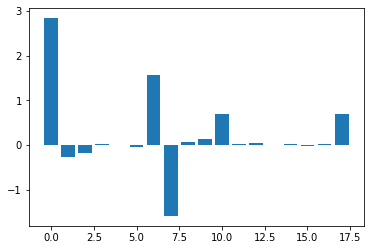

In [50]:
import joblib
from matplotlib import pyplot
#These coefficients can provide the basis for a crude feature importance score
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f col:%s' % (i,v,cols[i]))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**Prediction**

In [51]:
res = logreg_cv.best_estimator_.predict(X_test_scaled)

In [52]:
np.mean(logreg_cv.best_estimator_.predict(X_test_scaled) == y_test)

0.827247191011236

# **Random Forest**

## **Create the grid**

In [53]:
# Random Forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
# will be sqrt of the column number without the FULL_CVD_RISK column - auto and sqrt is the same
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.5,1, 2, 4]

RF_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

RF_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['log2', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [1, 2, 5, 10],
 'min_samples_leaf': [0.5, 1, 2, 4]}

## **Build the model**

In [54]:
RF = RandomForestClassifier()
#optimization
RF_cv = RandomizedSearchCV(RF, RF_grid, n_iter = 50, n_jobs = -1, cv = 10, random_state = 1).fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

In [55]:
RF_cv.best_score_
model = RF_cv.best_estimator_

0.8037101556708672

In [56]:
RF_cv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 80}

**Perdiction**

In [57]:
np.mean(RF_cv.best_estimator_.predict(X_test_scaled) == y_test)

0.8132022471910112

# **k-nearest neighbors**

## **Create the grid and build the model**

In [33]:
n_neighbors = np.arange(3, 99, 2)
p = [1,2]

# Create the grid
KNN_grid = {'n_neighbors': n_neighbors, "p":p}
print(KNN_grid)
KNN = KNeighborsClassifier(n_neighbors)
KNN_cv = GridSearchCV(KNN, KNN_grid, n_jobs = -1, cv = 10).fit(X_train_scaled, y_train)    

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97]), 'p': [1, 2]}


**Prediction**

In [34]:
KNN_cv.best_score_

0.7542068198665678

In [35]:
model = KNN_cv.best_params_

In [36]:
KNN_cv.n_features_in_

18

In [37]:
res= KNN_cv.best_estimator_.predict(X_test_scaled)
res[10]

'Medium'

In [38]:
np.mean(KNN_cv.best_estimator_.predict(X_test_scaled) == y_test)

0.7668539325842697

Accuracy classification score

In [58]:
from sklearn.metrics import accuracy_score
y_pred =  KNN_cv.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.2050561797752809


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
